In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np

%matplotlib inline
import plotnine as p9

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
fontname = r'C:\Users\sasha\AppData\Local\Microsoft\Windows\Fonts\NanumGothicCoding.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)
fontprop = fm.FontProperties(fname=fontname, size=14)
plt.rcParams["font.family"] = 'NanumGothic'
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

In [3]:
file_2001 = r"C:\Users\sasha\Documents\Bigdata\2001\2001년평균.csv"
file_2002 = r"C:\Users\sasha\Documents\Bigdata\2002\2002년평균.csv"
file_2003 = r"C:\Users\sasha\Documents\Bigdata\2003\2003년평균.csv"
file_2004 = r"C:\Users\sasha\Documents\Bigdata\2004\2004년평균.csv"
file_2005 = r"C:\Users\sasha\Documents\Bigdata\2005\2005년평균.csv"

for i in range(2001,2006):
    globals()['df_{}'.format(i)] = pd.read_csv( globals()['file_{}'.format(i)], encoding='utf-8')

In [4]:
for i in range(2001,2006):
    globals()['df_{}'.format(i)]['시군구명'].fillna(globals()['df_{}'.format(i)]['시도명'], inplace = True)
    globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)][['시군구명', 'annual_PM10']]
    globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)].sort_values(by=['annual_PM10'],ascending = False)
    globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)].set_index('시군구명',drop = True)

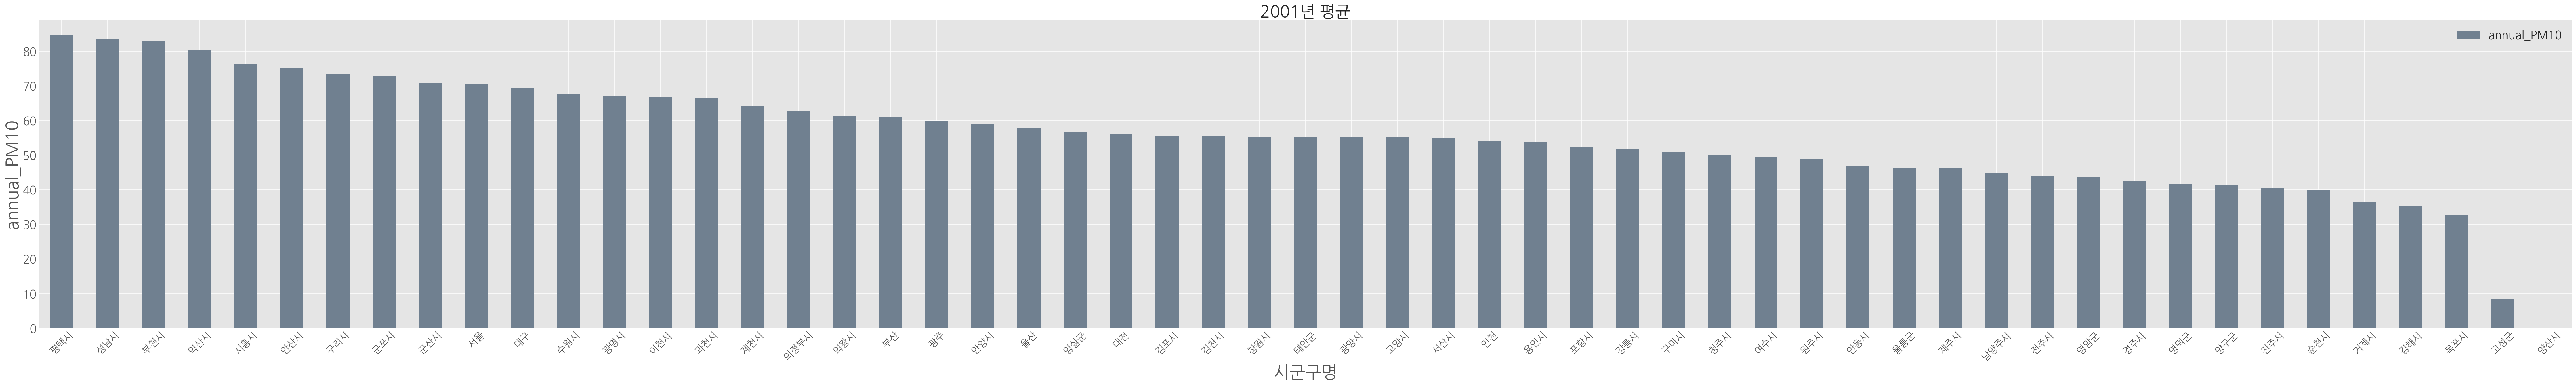

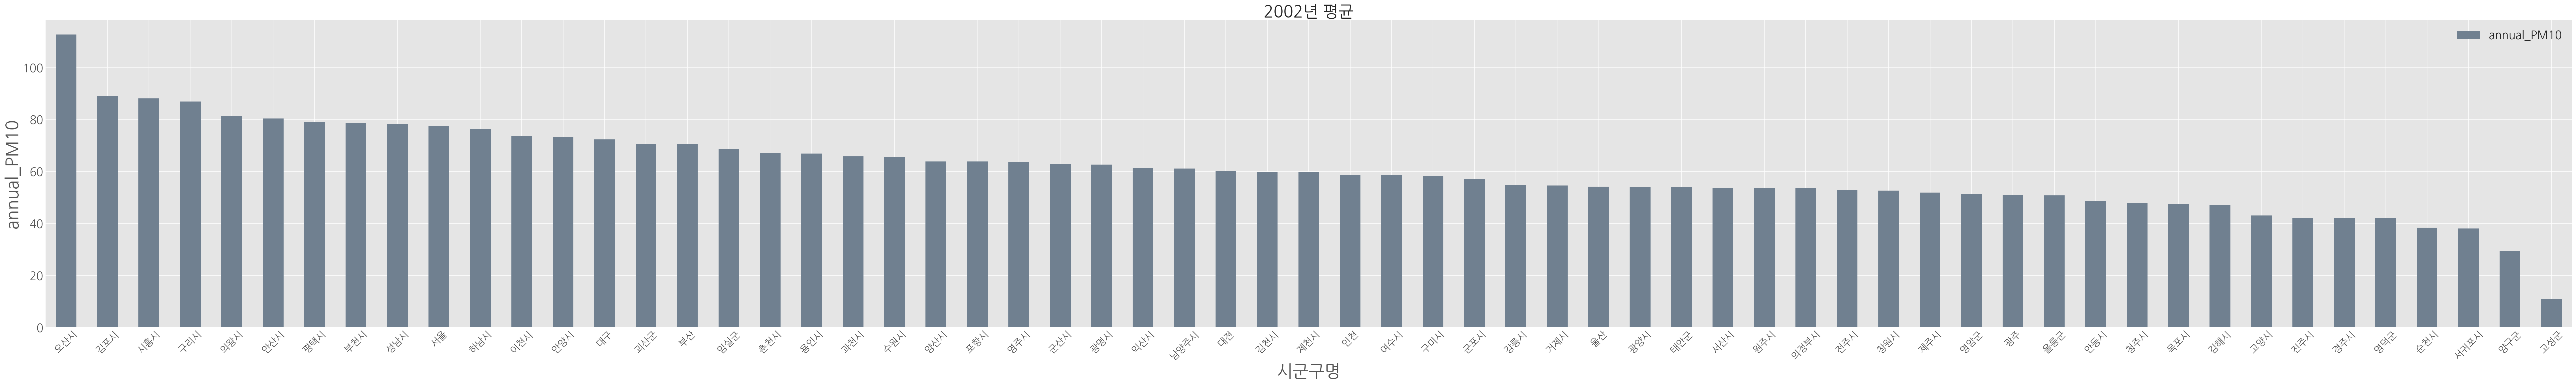

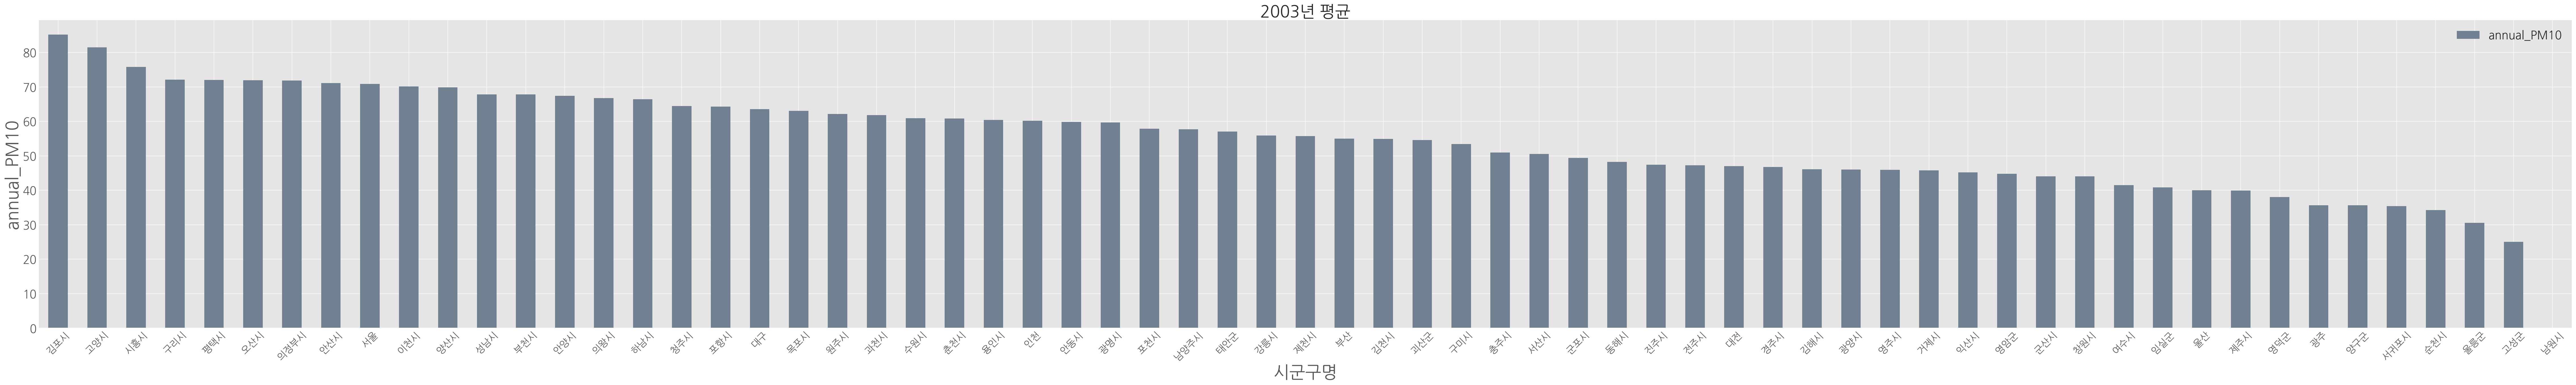

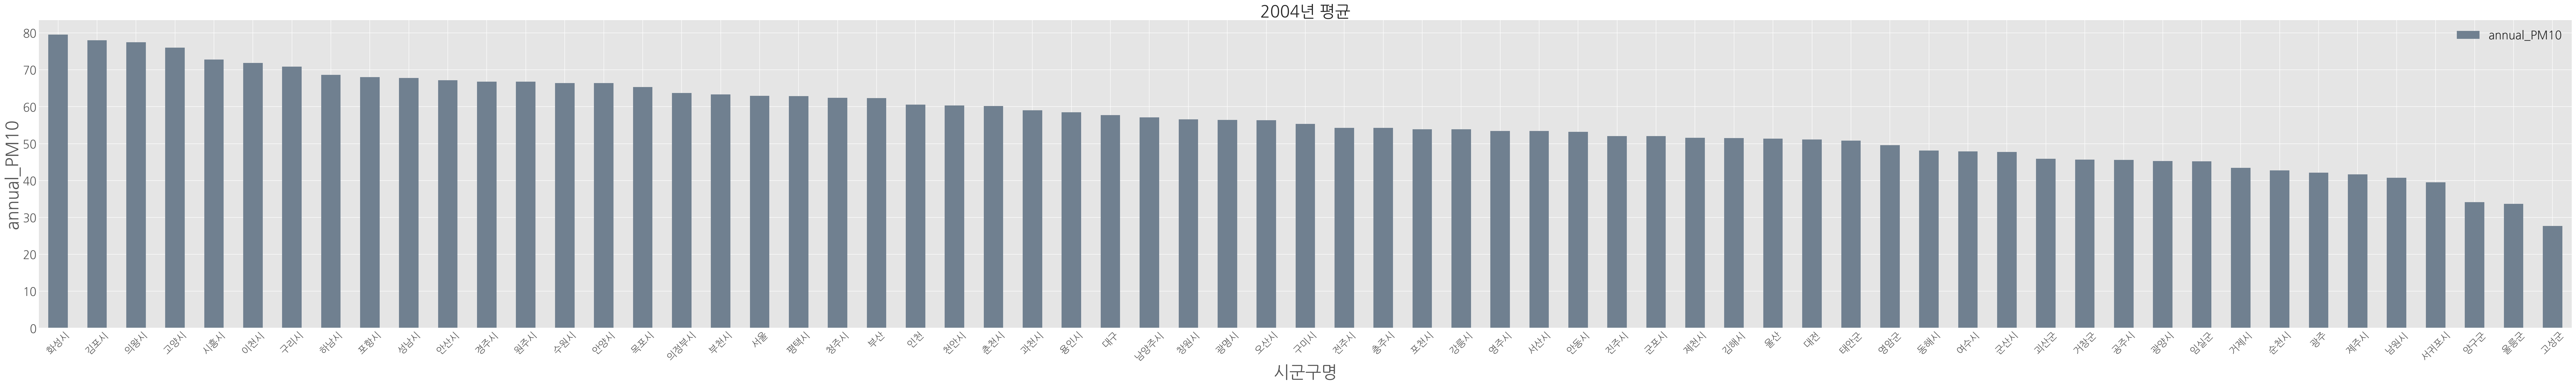

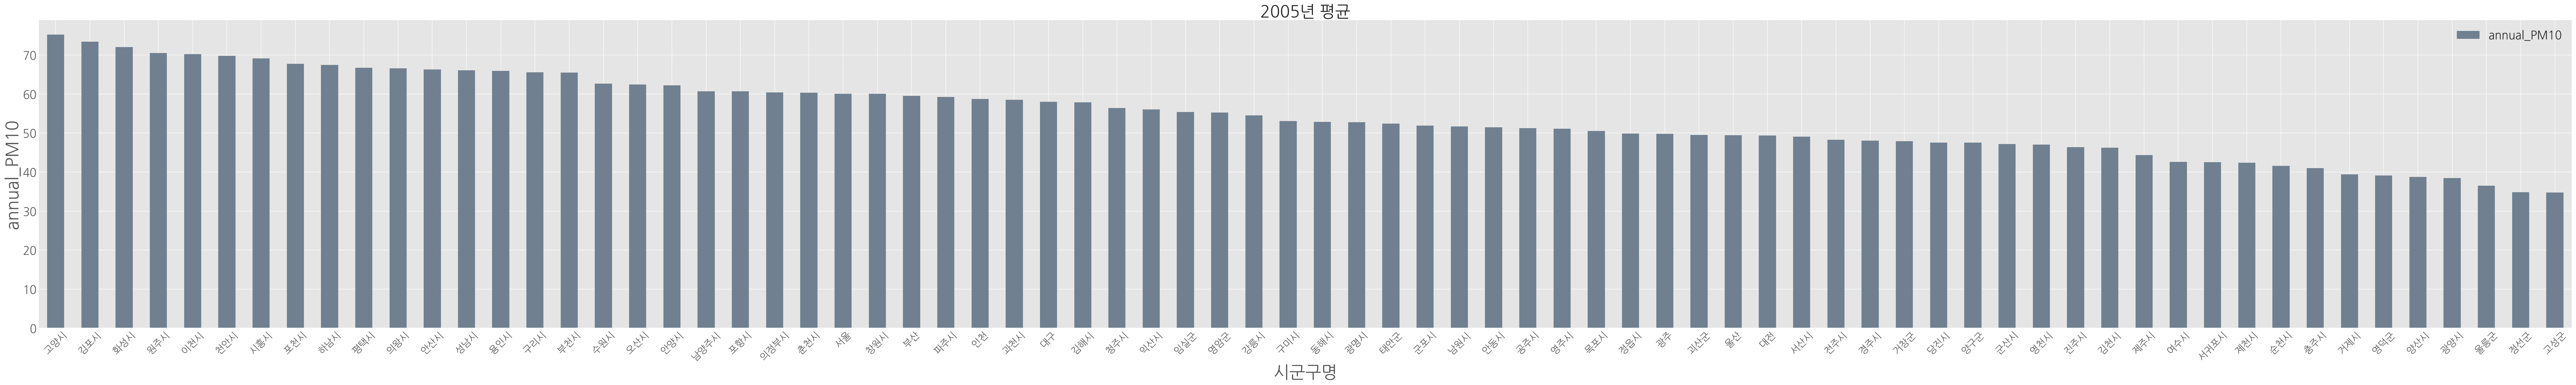

In [5]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

for i in range(2001,2006):
    globals()['df_{}'.format(i)].plot(kind='bar',figsize=(80, 10),color='slategray')
    plt.title("{}년 평균".format(i))
    plt.xlabel('시군구명')
    plt.ylabel('annual_PM10')
    plt.xticks(rotation=45,ha = 'center')
    fig = plt.gcf()
    plt.show()
    fig.savefig("{}.jpg".format(i), dpi=fig.dpi)
    print()

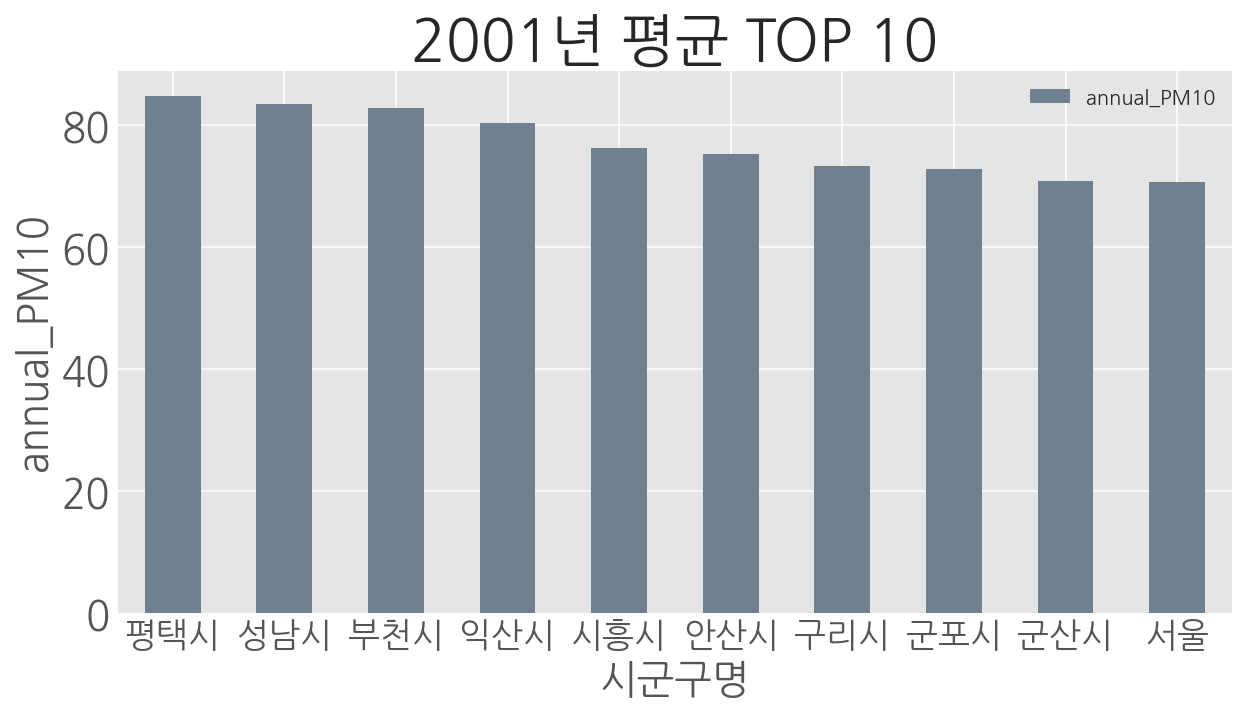

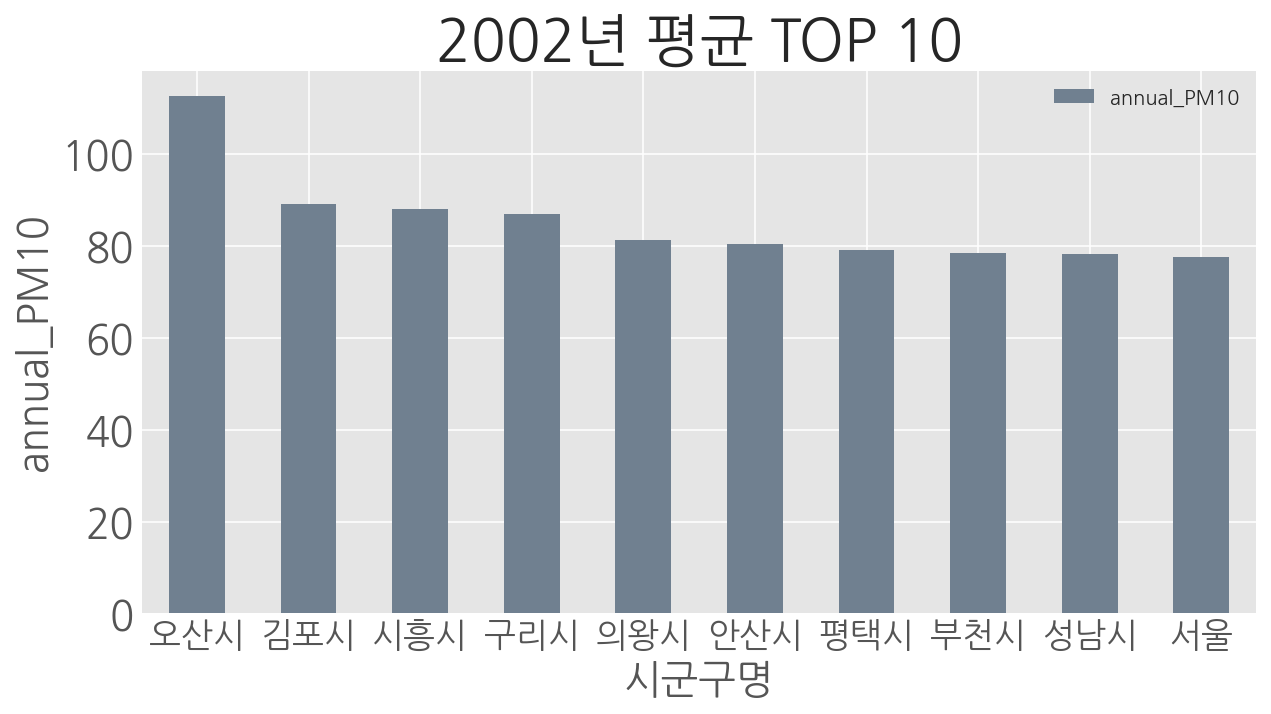

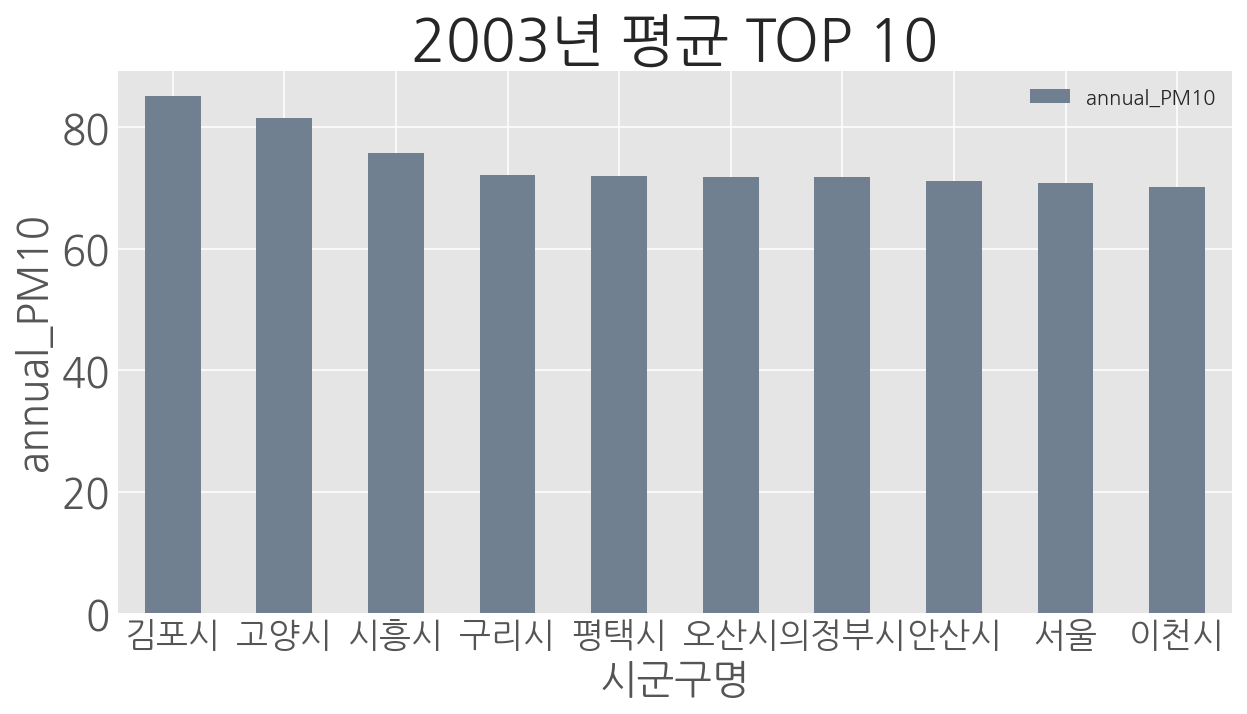

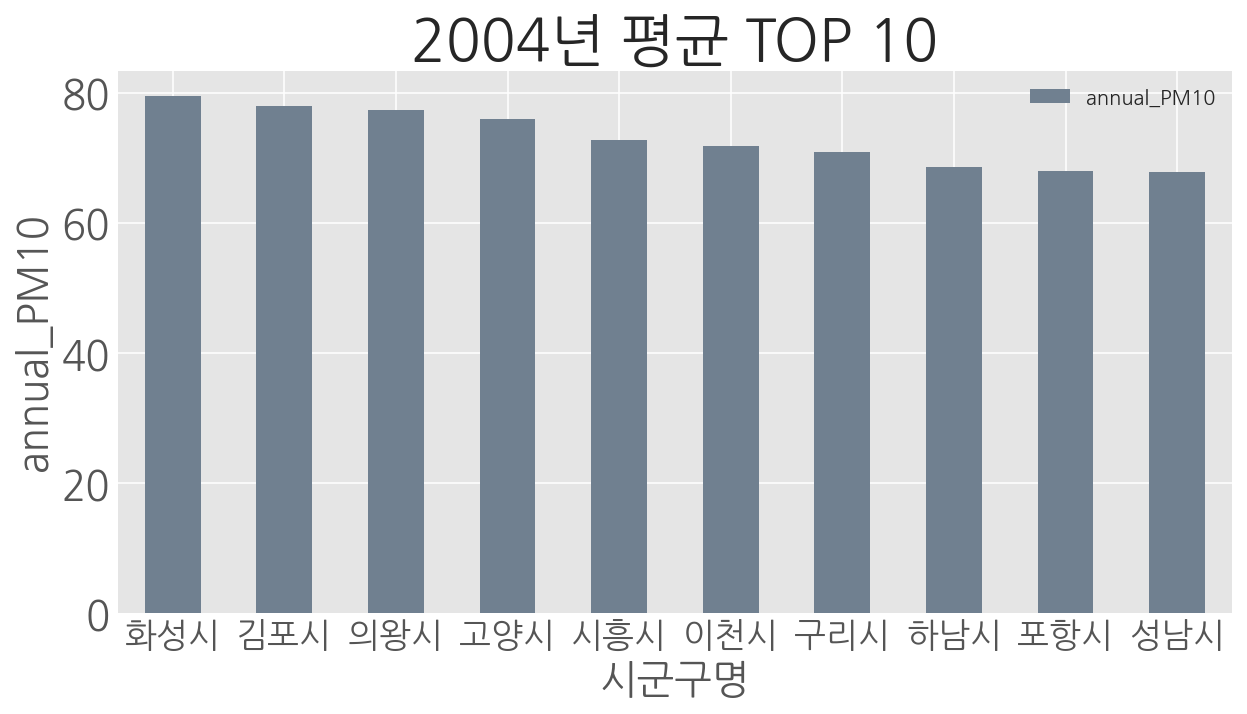

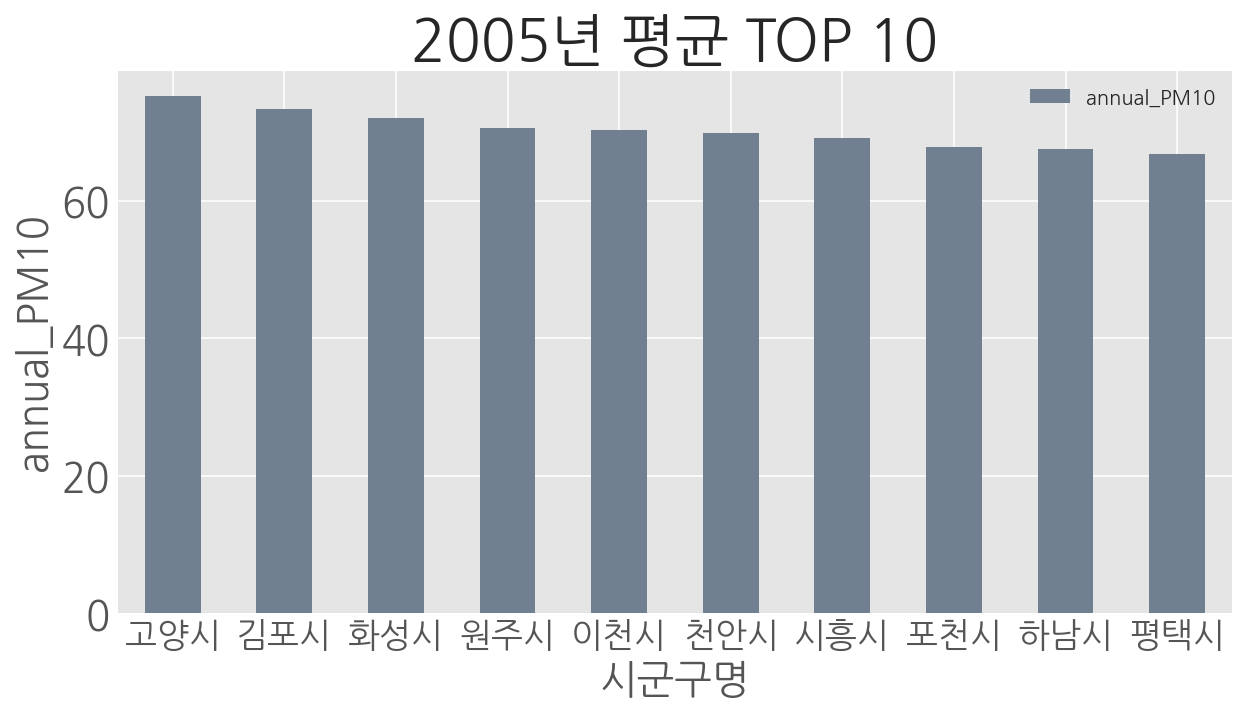

In [6]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=30) # figure title 폰트 크기

for i in range(2001,2006):
    globals()['df_{}'.format(i)].nlargest(10,'annual_PM10').plot(kind='bar',figsize=(10, 5),color='slategray')
    plt.title("{}년 평균 TOP 10".format(i))
    plt.xlabel('시군구명')
    plt.ylabel('annual_PM10')
    plt.xticks(rotation=0,ha = 'center')
    fig = plt.gcf()
    plt.show()
    fig.savefig("{}TOP 10.jpg".format(i), dpi=fig.dpi)
    print()